In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_26531_R')

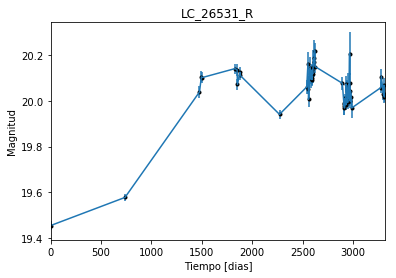

In [2]:
data = np.genfromtxt('LC_26531_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_26531_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

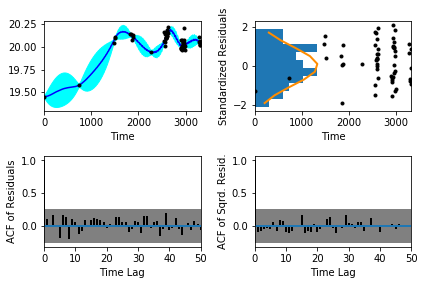

In [5]:
sample.assess_fit()

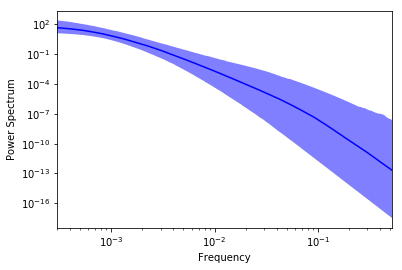

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_26531_R')

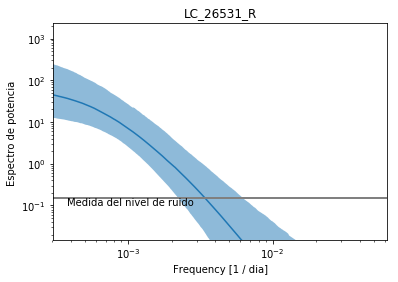

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_26531_R')

Text(0.5,1,'Prediccion , valor esperado LC_26531_R')

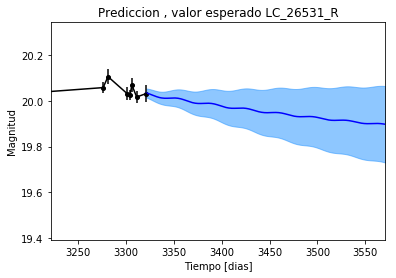

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_26531_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_26531_R')

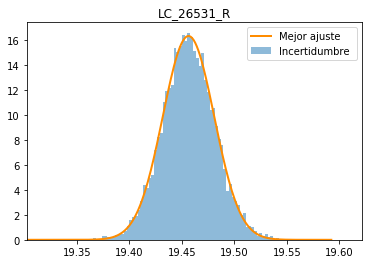

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_26531_R')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_R')

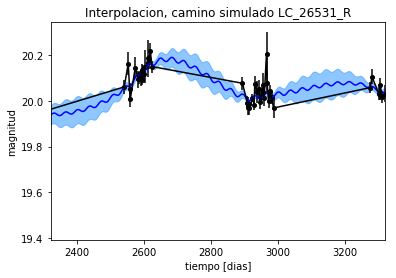

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_R')


Text(0.5,1,'Interpolacion, camino simulado LC_26531_R')

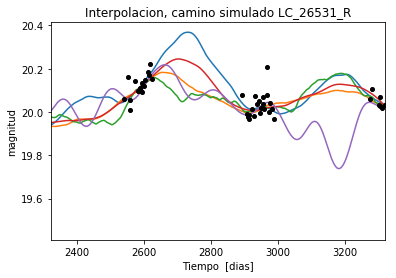

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 460.466941764
Median: 0.0140592454091
Standard deviation: 0.214237344701
68% credibility interval: [ 0.00099154  0.22222028]
95% credibility interval: [  3.56172237e-04   8.41774071e-01]
99% credibility interval: [  3.13187405e-04   1.01469665e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 940.033830808
Median: 0.000870168997407
Standard deviation: 0.06138213253
68% credibility interval: [ 0.00036899  0.00936389]
95% credibility interval: [ 0.00031125  0.12076888]
99% credibility interval: [  3.02972618e-04   4.62554301e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 572.28617662
Median: 0.0150175879929
Standard de

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1286.5335108
Median: 113.689232743
Standard deviation: 1.68164082516
68% credibility interval: [ 111.72953378  114.90794697]
95% credibility interval: [ 109.32987136  115.63508313]
99% credibility interval: [ 107.28461968  116.02710881]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 401.967483212
Median: 0.644890530595
Standard deviation: 2.15832135373
68% credibility interval: [ 0.04408432  3.95064826]
95% credibility interval: [ 0.01278713  6.98136583]
99% credibility interval: [  9.23916711e-03   1.06863369e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 729.646599238
Median: 0.266398613611
Standard deviation: 7.54885659869
68% credibility interval: [ 0.01529507  5.5564465 ]
95% credibility interval: [  1.5

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 3.41637341319e-37
Standard deviation: 5.02614817887e+99
68% credibility interval: [  2.82406408e-97   4.11126208e-13]
95% credibility interval: [  3.84693137e-159   9.98798290e-001]
99% credibility interval: [  4.37380562e-203   1.54542595e+011]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3033.55074303
Median: 19.8562656728
Standard deviation: 0.168148173418
68% credibility interval: [ 19.71013593  19.99218038]
95% credibility interval: [ 19.4922823   20.18982123]
99% credibility interval: [ 19.27852092  20.36072111]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 292.564811972
Median: 0.0
Standard deviation: 0.213869529334
68% credibility interval: [ 0.          0.20256178]
95% credibility interval: [ 0.          0.81361371]
99% credibility interval: [ 0.          1.00053397]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 292.564811972
Median: 0.0
Standard deviation: 0.213869529334
68% credibility interval: [ 0.          0.20256178]
95% credibility interval: [ 0.          0.81361371]
99% credibility interval: [ 0.          1.00053397]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 839.443939896
Median: 0.0
Standard deviation: 0.000212527721985
68% credibility interval: [ 0.

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1286.5335108
Median: 113.689232743
Standard deviation: 1.68164082516
68% credibility interval: [ 111.72953378  114.90794697]
95% credibility interval: [ 109.32987136  115.63508313]
99% credibility interval: [ 107.28461968  116.02710881]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1280.57727004
Median: 0.0756134228243
Standard deviation: 0.0948197563235
68% credibility interval: [ 0.04282143  0.16141524]
95% credibility interval: [ 0.02759166  0.36142814]
99% credibility interval: [ 0.02101318  0.59261861]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1324.83532868
Median: 1.0713308488
Standard deviation: 0.168114584513
68% credibility interval: [ 0.92127631  1.25176867]
95% credibility interval: [ 0.80029191  1.45838399]
99% credibility interval: [ 0.73290119  1.61659224]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 537.639049255
Median: 5.48113854012e-05
Standard deviation: 0.0322670594152
68% credibility interval: [  2.17440901e-06   1.35000943e-03]
95% credibility interval: [  1.33335001e-07   1.65502353e-02]
99% credibility interval: [  7.91464164e-17   4.70523972e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 460.466941764
Median: (-0.0883368441846+0j)
Standard deviation: 1.90202942836
68% credibility interval: [-1.3962512+0.j         -0.0062300-2.88490091j]
95% credibility interval: [ -5.28902248e+00+0.j          -2.23789617e-03-0.00592112j]
99% credibility interval: [ -6.37552707e+00+0.j          -1.96781450e-03-0.07844764j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 940.033830808
Median: (-0.00546743305927+0.11952846217j)
Standard deviation: 1.39803261764
68% credibility interval: [-0.05883503+0.1641924j -0.00231843+0.j       ]
95% credibility interval: [-0.75881328+1.48144803j -0.00195564+0.j        ]
99% credibility interval: [ -2.90631439e+00+1.58158026j  -1.90363310e-03+0.04470265j]
Posterior summary for paramet